In [29]:
%matplotlib inline

from tabula import read_pdf
import pandas as pd

This notebook contains code to read the tables from ""


In [47]:
def read_page(pages):
    df = read_pdf('data/nvsr67_07-508.pdf', pages=pages)
    df.columns = df.loc[2]
    df.drop([0,1,2], inplace=True)
    return df

In [48]:
df1 = read_page(9)

In [49]:
df2 = read_page(10)
df2.head()

2,Age (years),qx,lx,dx,Lx,Tx,ex
3,61–62 . . . . . . . . . . . . . . . . . . . ....,0.009652,"87,763",847,"87,339","1,968,648",22.4
4,62–63 . . . . . . . . . . . . . . . . . . . ....,0.010353,"86,915",900,"86,466","1,881,309",21.6
5,63–64 . . . . . . . . . . . . . . . . . . . ....,0.011081,"86,016",953,"85,539","1,794,843",20.9
6,64–65 . . . . . . . . . . . . . . . . . . . ....,0.011838,"85,062","1,007","84,559","1,709,304",20.1
7,65–66 . . . . . . . . . . . . . . . . . . . ....,0.012634,"84,055","1,062","83,524","1,624,745",19.3


In [50]:
df = pd.concat([df1, df2], ignore_index=True)
df.head()

2,Age (years),qx,lx,dx,Lx,Tx,ex
0,0–1 . . . . . . . . . . . . . . . . . . . . ....,0.005894,"100,000",589,"99,483","7,872,239",78.7
1,1–2 . . . . . . . . . . . . . . . . . . . . ....,0.000403,"99,411",40,"99,391","7,772,756",78.2
2,2–3 . . . . . . . . . . . . . . . . . . . . ....,0.000252,"99,371",25,"99,358","7,673,366",77.2
3,3–4 . . . . . . . . . . . . . . . . . . . . ....,0.000193,"99,345",19,"99,336","7,574,008",76.2
4,4–5 . . . . . . . . . . . . . . . . . . . . ....,0.000145,"99,326",14,"99,319","7,474,672",75.3


In [51]:
df.tail()

2,Age (years),qx,lx,dx,Lx,Tx,ex
96,96–97 . . . . . . . . . . . . . . . . . . . ....,0.247715,"7,175","1,777","6,286","21,040",2.9
97,97–98 . . . . . . . . . . . . . . . . . . . ....,0.268255,"5,398","1,448","4,674","14,753",2.7
98,98–99 . . . . . . . . . . . . . . . . . . . ....,0.289322,"3,950","1,143","3,378","10,079",2.6
99,99–100 . . . . . . . . . . . . . . . . . . . ...,0.310753,"2,807",872,"2,371","6,701",2.4
100,100 and over . . . . . . . . . . . . . . . . ...,1.000000,"1,935","1,935","4,330","4,330",2.2


In [53]:
qx = df['qx'].astype(float)

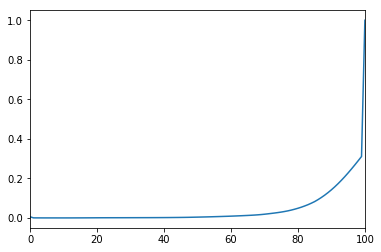

In [54]:
qx.plot()

In [55]:
qx

0      0.005894
1      0.000403
2      0.000252
3      0.000193
4      0.000145
5      0.000143
6      0.000128
7      0.000116
8      0.000104
9      0.000095
10     0.000091
11     0.000098
12     0.000125
13     0.000174
14     0.000241
15     0.000314
16     0.000388
17     0.000473
18     0.000566
19     0.000660
20     0.000757
21     0.000846
22     0.000914
23     0.000958
24     0.000984
25     0.001004
26     0.001028
27     0.001056
28     0.001094
29     0.001138
         ...   
71     0.020689
72     0.022709
73     0.024795
74     0.027078
75     0.029614
76     0.032507
77     0.035786
78     0.039616
79     0.044017
80     0.048899
81     0.054283
82     0.060367
83     0.066954
84     0.074533
85     0.082695
86     0.092575
87     0.103427
88     0.115296
89     0.128216
90     0.142211
91     0.157287
92     0.173433
93     0.190616
94     0.208781
95     0.227849
96     0.247715
97     0.268255
98     0.289322
99     0.310753
100    1.000000
Name: qx, Length: 101, d

In [57]:
qx.to_csv('data/us_life_tables_2015.csv', header=True)